### Problem Statement: Developing an Automated Health Insurance Cost Prediction System for a MedicalCompany


## Context and Company Vision:
    
###   * The healthcare industry is undergoing significant changes and advancements.
###   * Our medical company aims to improve operational efficiency and customer experience.
###   * We plan to achieve this by implementing an advanced automation system.


## Primary Objective:

###    * Develop a predictive model capable of accurately estimating health insurance costs.
###    * The focus is on individual policyholders, tailoring predictions to therir specific circumstances.

## Work Flow
#### Data Collection
#### Data Preprocessing
#### Feature Engineering 
#### Data Splitting and Validation
#### Model Training 
#### Model Evaluation


## Importing Dependencies

In [2]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection and Analysis


In [4]:
insurance_data = pd.read_csv('E:/NOTES/DataSets/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#to know rows and columns
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# check the missing values in all features 
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#statistical analysis of data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

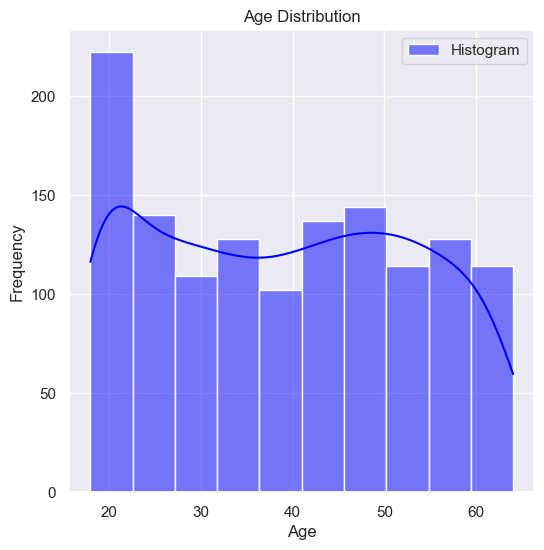

In [22]:
sns.set()
plt.figure(figsize=(6,6))
age_data = insurance_data['age']
sns.histplot(data=age_data,bins=10,kde=True,color='blue',label='Histogram')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [34]:
count =0
for i in age_data:
    if (age_data[i]>0 and age_data[i]<=20):
        count+=1

In [35]:
count

212

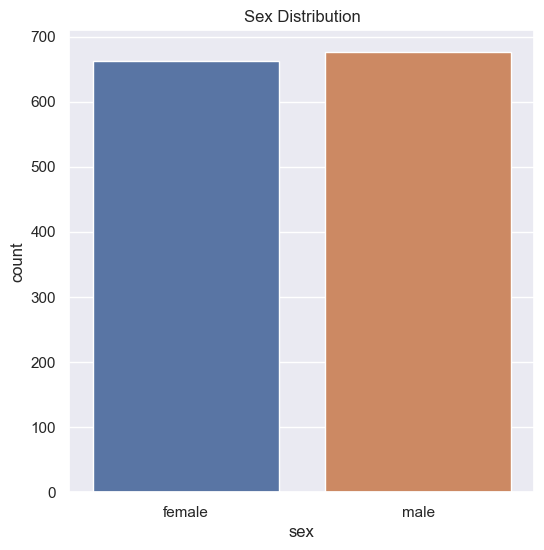

In [38]:
plt.figure(figsize=(6,6))
#use to plot the categorical data into bar format
sns.countplot(x='sex',data=insurance_data)
plt.title("Sex Distribution")
plt.show()


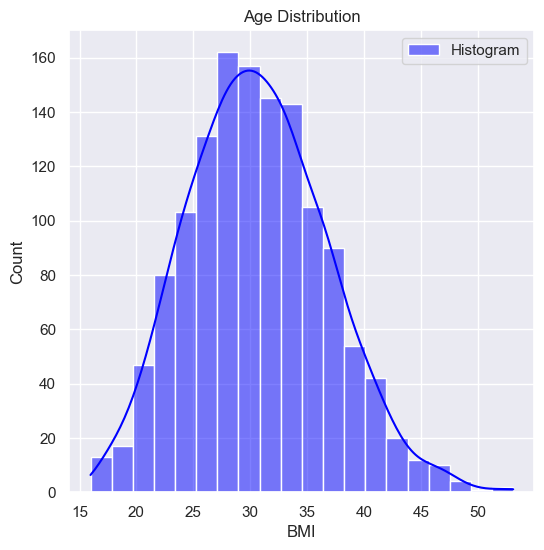

In [42]:
sns.set()
plt.figure(figsize=(6,6))
age_data = insurance_data['bmi']
#create histogram
sns.histplot(data=age_data,bins=20,kde=True,color='blue',label='Histogram')
plt.title('Age Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

### Normal BMI --- 18.5 to 24.9

#### Lot of people having BMI more than 24.9, that affects their health premium

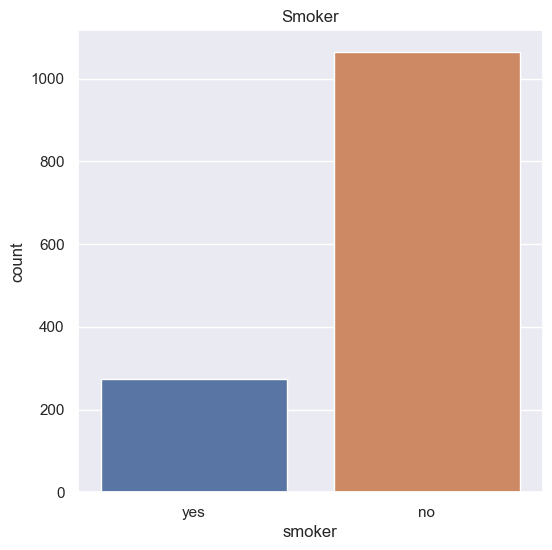

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker')
plt.show()

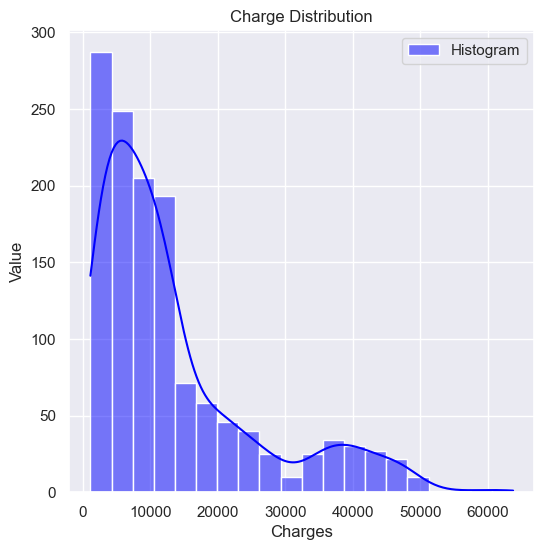

In [45]:
#charge Distribution

sns.set()
plt.figure(figsize=(6,6))
charge_data = insurance_data['charges']
#create histogram
sns.histplot(data=charge_data,bins=20,kde=True,color='blue',label='Histogram')
plt.title('Charge Distribution')
plt.xlabel('Charges')
plt.ylabel('Value')
plt.legend()
plt.show()

## Encoding Categorical Columns


In [47]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [48]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting Features and Target


In [53]:
X=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [54]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [51]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting data into Train and Test

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Model Training


In [57]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [58]:
training_data_prediction = regressor.predict(X_train)

In [60]:
training_data_prediction

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [62]:
y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [63]:
# R Squared Value
r2_train = metrics.r2_score(y_train,training_data_prediction)
r2_train

0.751505643411174

In [64]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


## Building a predictive System

In [66]:
input_data = (20,1,36.85,0,1,2)
#Convert the tuple into Numpy Array
data_array = np.asarray(input_data)
data_array

array([20.  ,  1.  , 36.85,  0.  ,  1.  ,  2.  ])

In [67]:
data_array.shape

(6,)

In [71]:
#reshape the array
# reshaped_array = data_array.reshape(1,-1) # reshaping into a 1*1 array
# prediction = regressor.predict(reshaped_array)
prediction = regressor.predict(data_array)
prediction

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[20.    1.   36.85  0.    1.    2.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.